# 数据清洗

In [10]:
import numpy as np
import pandas as pd
zhihu=pd.read_excel('D:\知乎数据_201701.xlsx')
zhihu=zhihu.dropna()
# for k in ['职业1','职业2','居住地','职业经历','个人简介','所在行业','教育经历']:
#     j=0
#     for i in zhihu[k]:
#         if i!=i:
#             zhihu.drop(j,axis=0,inplace=True)
#         j=j+1
# for k in ['回答','提问','收藏']:
#     j=0
#     for i in zhihu[k]:
#         if i!=i:
#             zhihu.drop(j,axis=0,inplace=True)
#         j=j+1
zhihu.to_excel('D:\修改知乎.xlsx')
# print (zhihu['个人简介'])
# pd.DataFrame(framei).to_excel("D:\双侧检验.xlsx")

C:\Users\Administrator\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'http://www.7mayo.cn/联想和惠普都有政府关系部门，联想有一个销售能一次请来十几个市长来联想参观，http://money.163.com/13/0529/17/902FDQGO00253B0H.html中国体育用品业联合会现代法律有个观念叫“自甘风险”或叫“被害人承诺”，适用于竞技体育等有一定人身危险性的活动（但又是正当的活动）。基本上可以认为是从古代的生死状演变过来的，意思就是打伤了不需要对方负责。不过本着人文主义关怀和公序良俗的维护，现代法律对此种“自甘风险”的许诺，只限于造成轻伤的范围才有效，重伤及死亡的，仍然需要承担法律责任。作者：wang中南链接：https://www.zhihu.com/question/40058607/answer/84487544来源：知乎著作权归作者所有，转载请联系作者获得授权。http://www.onlinedown.net/soft/90749.htm纳加软件免费版' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


# 统计知友数量，计算知友密度

In [11]:
district=[]
for i in zhihu['居住地']:
    if i!='无':
        i=i[0:2]
        district.append(i)
# print (district)
result = {}
for i in set(district):
    result[i] = district.count(i)
result
area=pd.read_excel('D:\六普常住人口数.xlsx')
num={}
for i in range(area.shape[0]):
    if area['省'][i]==area['地区'][i]:
        num[area['省'][i][0:2]]=area['常住人口'][i]
total={}
max=0
min=1
for i in num:
    for j in result:
        if i==j:
            if result[i]>max:
                max=result[i]
            if result[i]<min:
                min=result[i]
            total[i]=result[i]/num[i]
standard={}
for i in num:
    for j in result:
        if i==j:
            standard[i]=(result[i]-min)/(max-min)


# 构建返回知友数量，密度的方法

In [12]:
def zhiyou(name):
    resul=result[name]
    tota=total[name]
    standar=standard[name]
    print ('知友数量：'+str(resul)+'\n知友密度：'+str(tota)+'\n标准化：'+str(standar))
zhiyou(input('请输入知友所在地：'))

请输入知友所在地：安徽
知友数量：18
知友密度：3.0251862892910354e-07
标准化：0.1


# 知友数量：

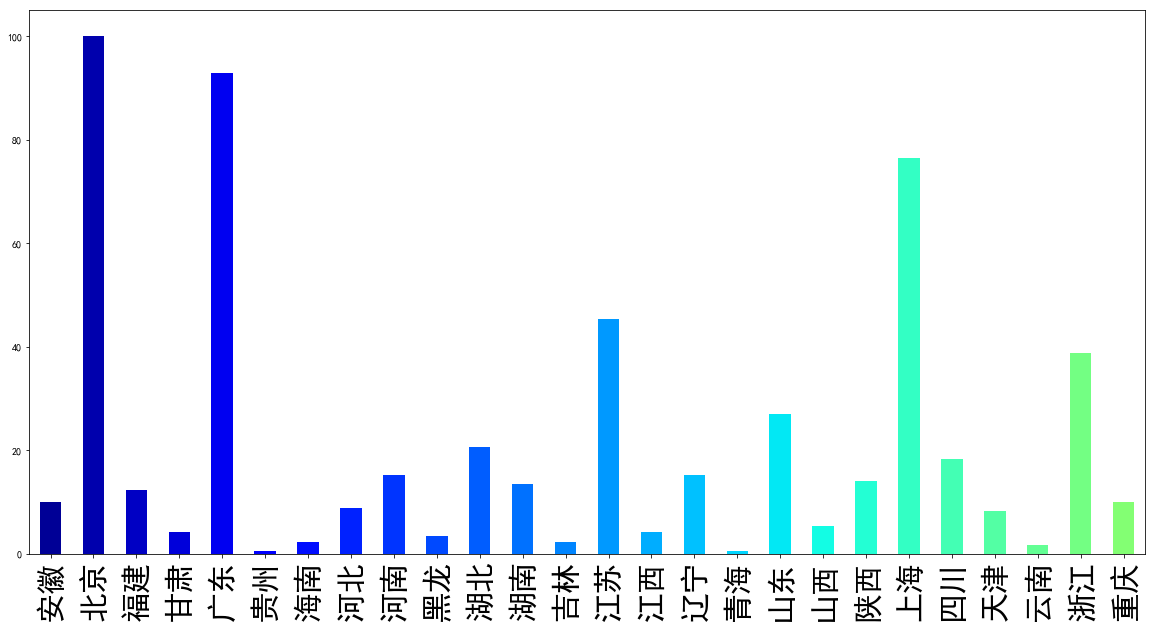

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pylab as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
a=[]
c=[]
for i in standard:
    a.append(i)
for i in a:
    c.append(standard[i]*100)
plt.subplots(1, 1,figsize=(20, 10))
data = pd.Series(c,index=a)
cc = (np.arange(54)+1)*5
plt.xticks(fontsize=30)
plt.yticks(fontsize=10)
data.plot(kind='bar',color=plt.cm.jet(cc)) 

# 知友密度：

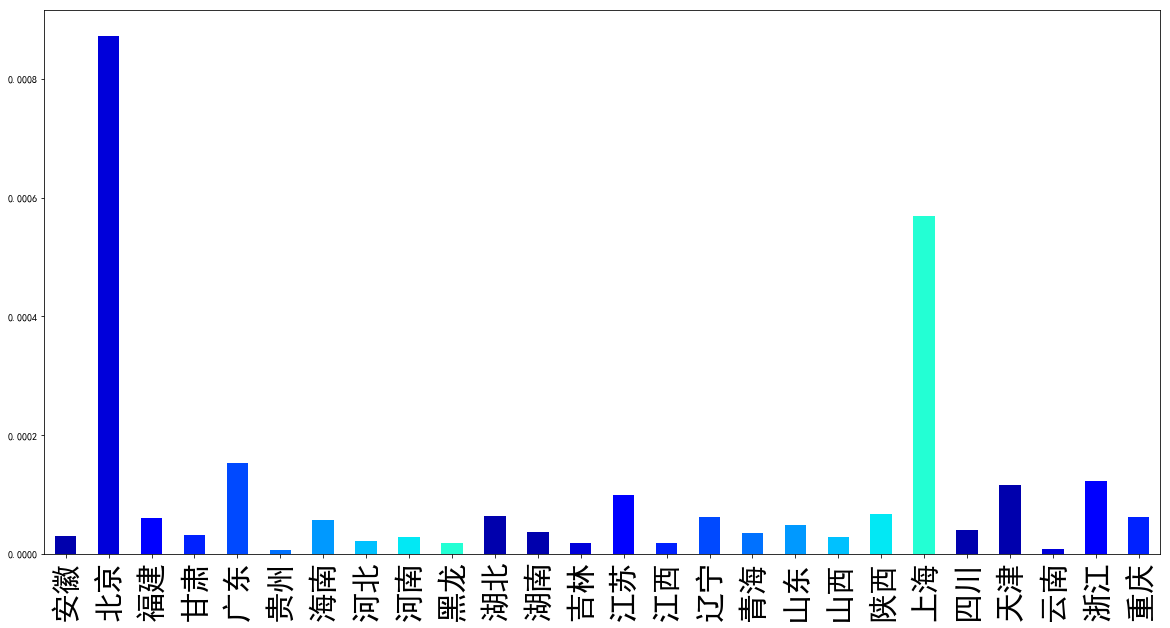

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pylab as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
a=[]
c=[]
for i in total:
    a.append(i)
for i in a:
    c.append(total[i]*100)
plt.subplots(1, 1,figsize=(20, 10))
data = pd.Series(c,index=a)
cc = (np.arange(10)+1)*10
plt.xticks(fontsize=30)
plt.yticks(fontsize=10)
data.plot(kind='bar',color=plt.cm.jet(cc)) 

# 第二题

# 知友全国地域分布情况，分析出TOP20

In [25]:
edu=[]
zhihu=pd.read_excel('D:\修改知乎.xlsx')
zhihu=pd.DataFrame(zhihu)
for i in zhihu['教育经历']:
    if type(i)==str:
        i=i[0:]
        edu.append(i)
# print (district)
result = {}
for i in set(edu):
    result[i] = edu.count(i)
result
beiguanzhu=zhihu.groupby('教育经历')
# guanzhu=zhihu.groupby('教育经历')
# guanzhu.sum()
beiguanzhu=beiguanzhu.sum()
beiguanzhu.sort_values(by='关注者',inplace=True,ascending=False)
a=beiguanzhu.iloc[1:40:,[1,2]]
for i in a.index:
    if i=='大学':
        a.drop(index=i,inplace=True)
    if '大学' in i or '学院' in i :
        continue
    else:
        a.drop(index=i,inplace=True)
a['关注'][:]
top20=a

In [26]:
a

,关注,关注者
教育经历,,
浙江大学,45057,604144
北京电影学院,5236,223671
北京大学,43343,197571
中央音乐学院北京师范大学,479,195175
吉林大学,28348,159261
上海财经大学,19603,138058
五道口男子职业技术学院,669,137133
哈尔滨工业大学（HIT）,26490,103087
四川大学,24640,100392


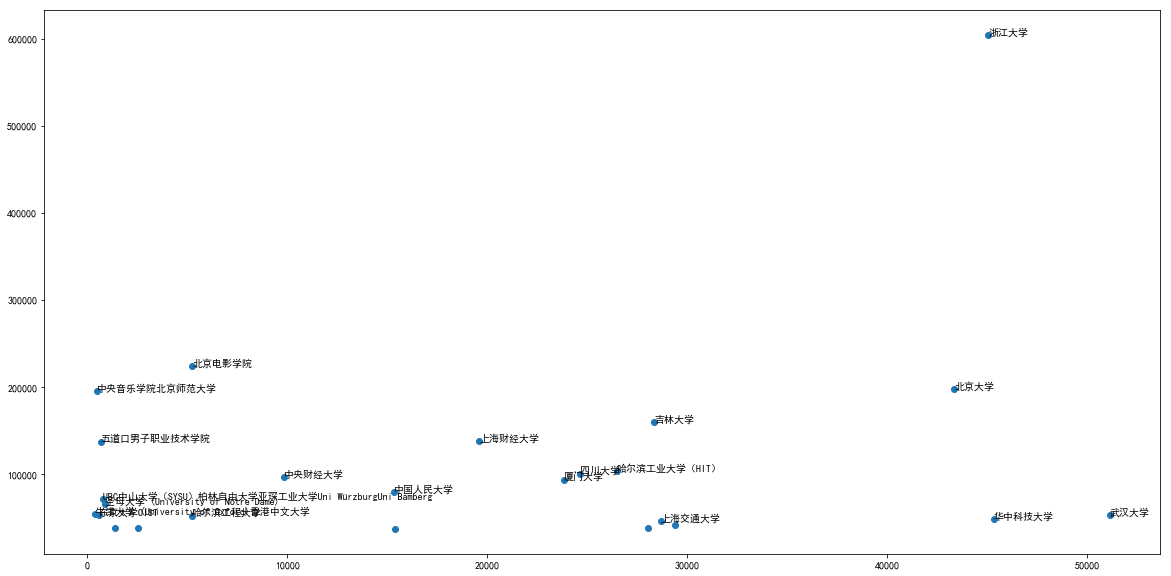

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# x = a['关注'][:]
# y = a['关注者'][:]
# # weight = np.arange(1,10)  
# # height=weight
# # print (x,y)
# plt.subplots(1, 1,figsize=(20, 10))
# plt.scatter(x,y)
# plt.xlim(0, 1500)
# plt.ylim(0, 1750)
# plt.axis()
# plt.title("粉丝数和关注人数")
# plt.xlabel("关注人数")
# plt.ylabel("粉丝数")
# plt.savefig("D:/知乎.png")
# plt.show()
plt.subplots(1, 1,figsize=(20, 10))
plt.scatter(x=top20['关注'],y=top20['关注者'])
for i in range(20):
    xuexiao = top20.index[i]
    guanzhu = top20.iloc[i,0]
    fensi = top20.iloc[i,1]
    plt.annotate(xuexiao, xy = (guanzhu,  fensi), xytext = (guanzhu,  fensi) )
plt.show()